# Analysis
- Baseline data, Random strategy, 10x (results_baseline.csv)
- 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('results_baseline.csv')
print(df.columns)

Index(['file_name', 'strategy', 'splits', 'backtracks', 'clauses', 'variables',
       'givens', 'unit_rule', 'pure_rule', 'execution_time'],
      dtype='object')


In [3]:
golden_standard = df.groupby('file_name').mean()

In [4]:
splits = golden_standard['splits']
backtracks = golden_standard['backtracks']
givens = golden_standard['givens']
unit_rule = golden_standard['unit_rule']
pure_rule = golden_standard['pure_rule']
pure_rule = golden_standard['pure_rule']

In [5]:
print(splits.mean(), splits.std())
print(backtracks.mean(), backtracks.std())
print(givens.mean(), givens.std())
print(unit_rule.mean(), unit_rule.std())
print(pure_rule.mean(), pure_rule.std())

66.33701149425288 82.81119213166082
61.975517241379315 82.29897577560575
22.836781609195402 2.161708554893838
129.31252873563218 165.10782233407247
129.31252873563218 165.10782233407247


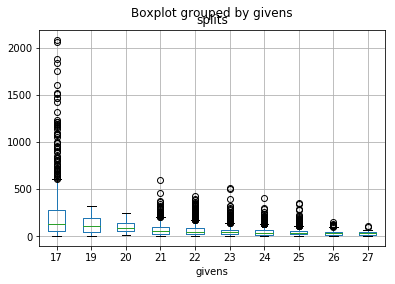

In [6]:
df.boxplot('splits', 'givens')

In [7]:
from collections import defaultdict

def make_bins(datadict, bin_size = 20):
    bins = defaultdict(int)
    for index, row in datadict.iterrows():
        b = int(row['splits'] / bin_size)
        bins[b] += 1
    return bins

bins = make_bins(golden_standard)

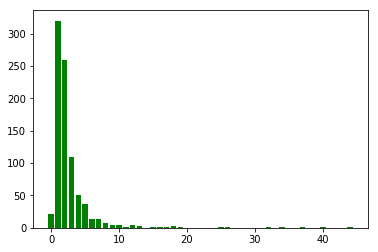

In [8]:
plt.bar(list(bins.keys()), bins.values(), color='g')
plt.show()

In [9]:
print(sorted(list(bins.keys()))[0:10])
print(bins.values())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
dict_values([2, 2, 51, 260, 8, 37, 109, 320, 5, 3, 14, 13, 1, 2, 4, 2, 4, 1, 3, 2, 22, 1, 1, 1, 1, 1])


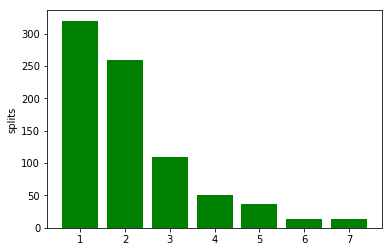

In [10]:
# TEST DATA MOEILIJKHEIDS VERDELING
def reduce_bins(bins, i,j):
    newbins = {}
    for item in sorted(list(bins.keys()))[i:j]:
        newbins[item] = bins[item]
    return newbins

new_bins = reduce_bins(bins, 1,8)
plt.bar(list(new_bins), new_bins.values(), color='g')
# plt.savefig('Bins_baseline_splits.png')
plt.ylabel("splits")
plt.show()

In [11]:
# Inlezen rdlis
df = pd.read_csv('results_rdlis.csv')
rdlis = df.groupby('file_name').mean()
print(rdlis.columns)

# Inlezen grab_first
df = pd.read_csv('results_grab_first.csv')
grab_first = df.groupby('file_name').mean()
print(grab_first.columns)

Index(['splits', 'backtracks', 'clauses', 'variables', 'givens', 'unit_rule',
       'pure_rule', 'execution_time'],
      dtype='object')
Index(['splits', 'backtracks', 'clauses', 'variables', 'givens', 'unit_rule',
       'pure_rule', 'execution_time'],
      dtype='object')


1.1156022477056637
[0.6507619285535848, 2.0067084730931892, 0.30434782608695654, 0.6936416184971098, 0.6375838926174496, 2.5045871559633026, 0.6755260243632337, 2.032258064516129, 0.44176706827309237, 0.3202846975088968]
[800.6, 685.7, 92.0, 51.9, 178.8, 109.0, 90.3, 62.0, 49.8, 84.3]


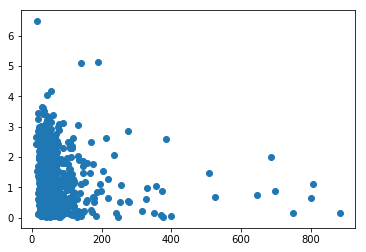

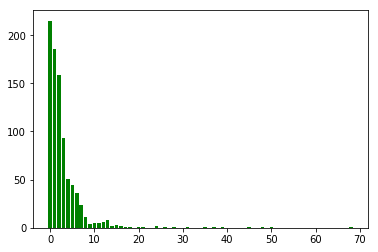

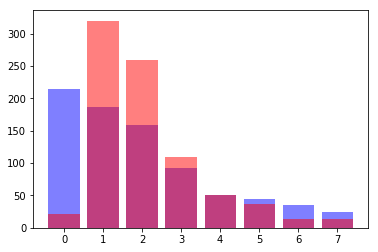

In [14]:
#Grab first
performance = []
for i, item in enumerate(grab_first["splits"]):
    performance += [item/golden_standard['splits'][i]]

print(sum(performance)/len(performance))
    
print(performance[0:10])
print(list(golden_standard["splits"])[0:10])
plt.scatter(list(golden_standard["splits"]), performance)
plt.show()
    
grab = make_bins(grab_first)
plt.bar(list(grab), grab.values(), color='g')
plt.show()

grab = reduce_bins(grab, 0,8)
new_bins = reduce_bins(bins, 0,8)
plt.bar(list(grab.keys()), grab.values(), color="b",alpha=0.5)
plt.bar(list(new_bins.keys()), new_bins.values(), color='r',alpha=0.5)
plt.show()

In [13]:
table with ave

SyntaxError: invalid syntax (<ipython-input-13-c12940a4f890>, line 1)

In [151]:
splits_rdlis = rdlis['splits']
backtracks_rdlis = rdlis['backtracks']
givens_rdlis = rdlis['givens']
unit_rule_rdlis = rdlis['unit_rule']
pure_rule_rdlis = rdlis['pure_rule']
pure_rule_rdlis = rdlis['pure_rule']

In [152]:
print(splits_rdlis.mean(), splits_rdlis.std())
print(backtracks_rdlis.mean(), backtracks_rdlis.std())
print(givens_rdlis.mean(), givens_rdlis.std())
print(unit_rule_rdlis.mean(), unit_rule_rdlis.std())
print(pure_rule_rdlis.mean(), pure_rule_rdlis.std())

75.93264367816091 99.36903411057449
72.25724137931034 98.98799586286927
22.836781609195402 2.161708554893838
149.18988505747126 198.35528681008321
149.18988505747126 198.35528681008321


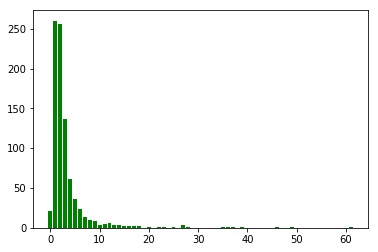

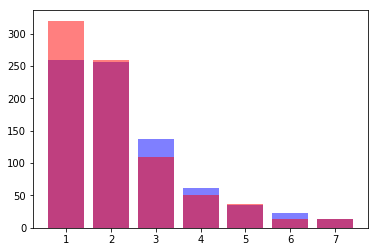

In [153]:
bins_rdlis = make_bins(rdlis)
plt.bar(list(bins_rdlis.keys()), bins_rdlis.values(), color='g')
plt.show()

new_bins_rdlis = reduce_bins(bins_rdlis, 1,8)
plt.bar(list(new_bins_rdlis.keys()), new_bins_rdlis.values(), color="b",alpha=0.5)
plt.bar(list(new_bins.keys()), new_bins.values(), color='r',alpha=0.5)
plt.show()